## Feature Engineering for Numerical Data

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing preprocessed data (dataset after outlier removal)
data=pd.read_csv('https://raw.githubusercontent.com/thamidu02/AIML_project/refs/heads/main/data/IT24102905.csv')

In [3]:
# converting imported dataset into a pandas dataframe
data_df=pd.DataFrame(data)

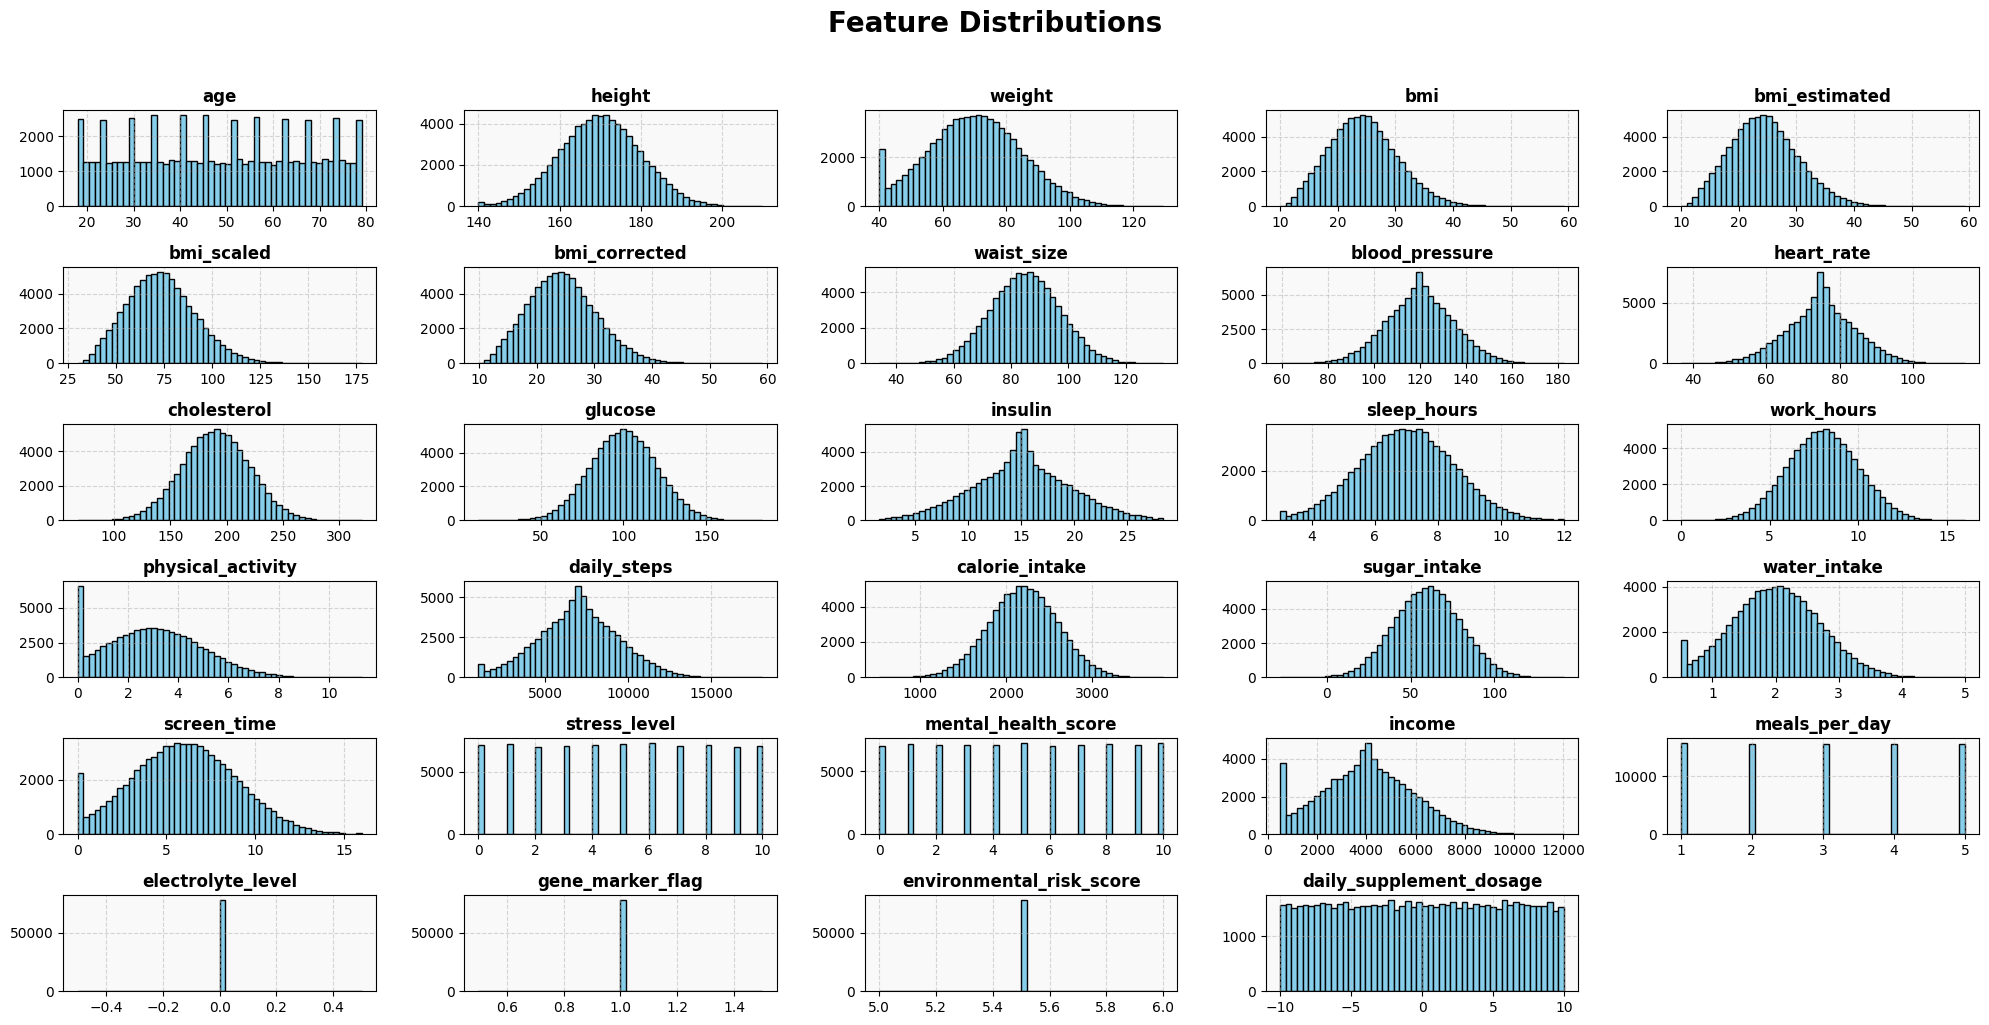

In [4]:
ax = data_df.hist(
    bins=50,
    figsize=(20, 10),
    color='skyblue',
    edgecolor='black',
    grid=False
)


for a in ax.ravel():
    a.set_facecolor("#f9f9f9")
    a.grid(True, linestyle='--', alpha=0.5)
    a.tick_params(axis='x', labelsize=10)
    a.tick_params(axis='y', labelsize=10)
    a.set_title(a.get_title(), fontsize=12, fontweight='bold')


plt.suptitle("Feature Distributions", fontsize=20, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

from the above feature distribution histograms we can see that features like electrolyte_level, gene_marker_flag and environmental_risk_score only contain one value therefore variance of the data in these features are zero so we can drop these columns.

In [5]:
# dropping the above mentioned features due to zero varinace
data_df.drop(labels=['electrolyte_level','gene_marker_flag','environmental_risk_score'],axis=1,inplace=True)

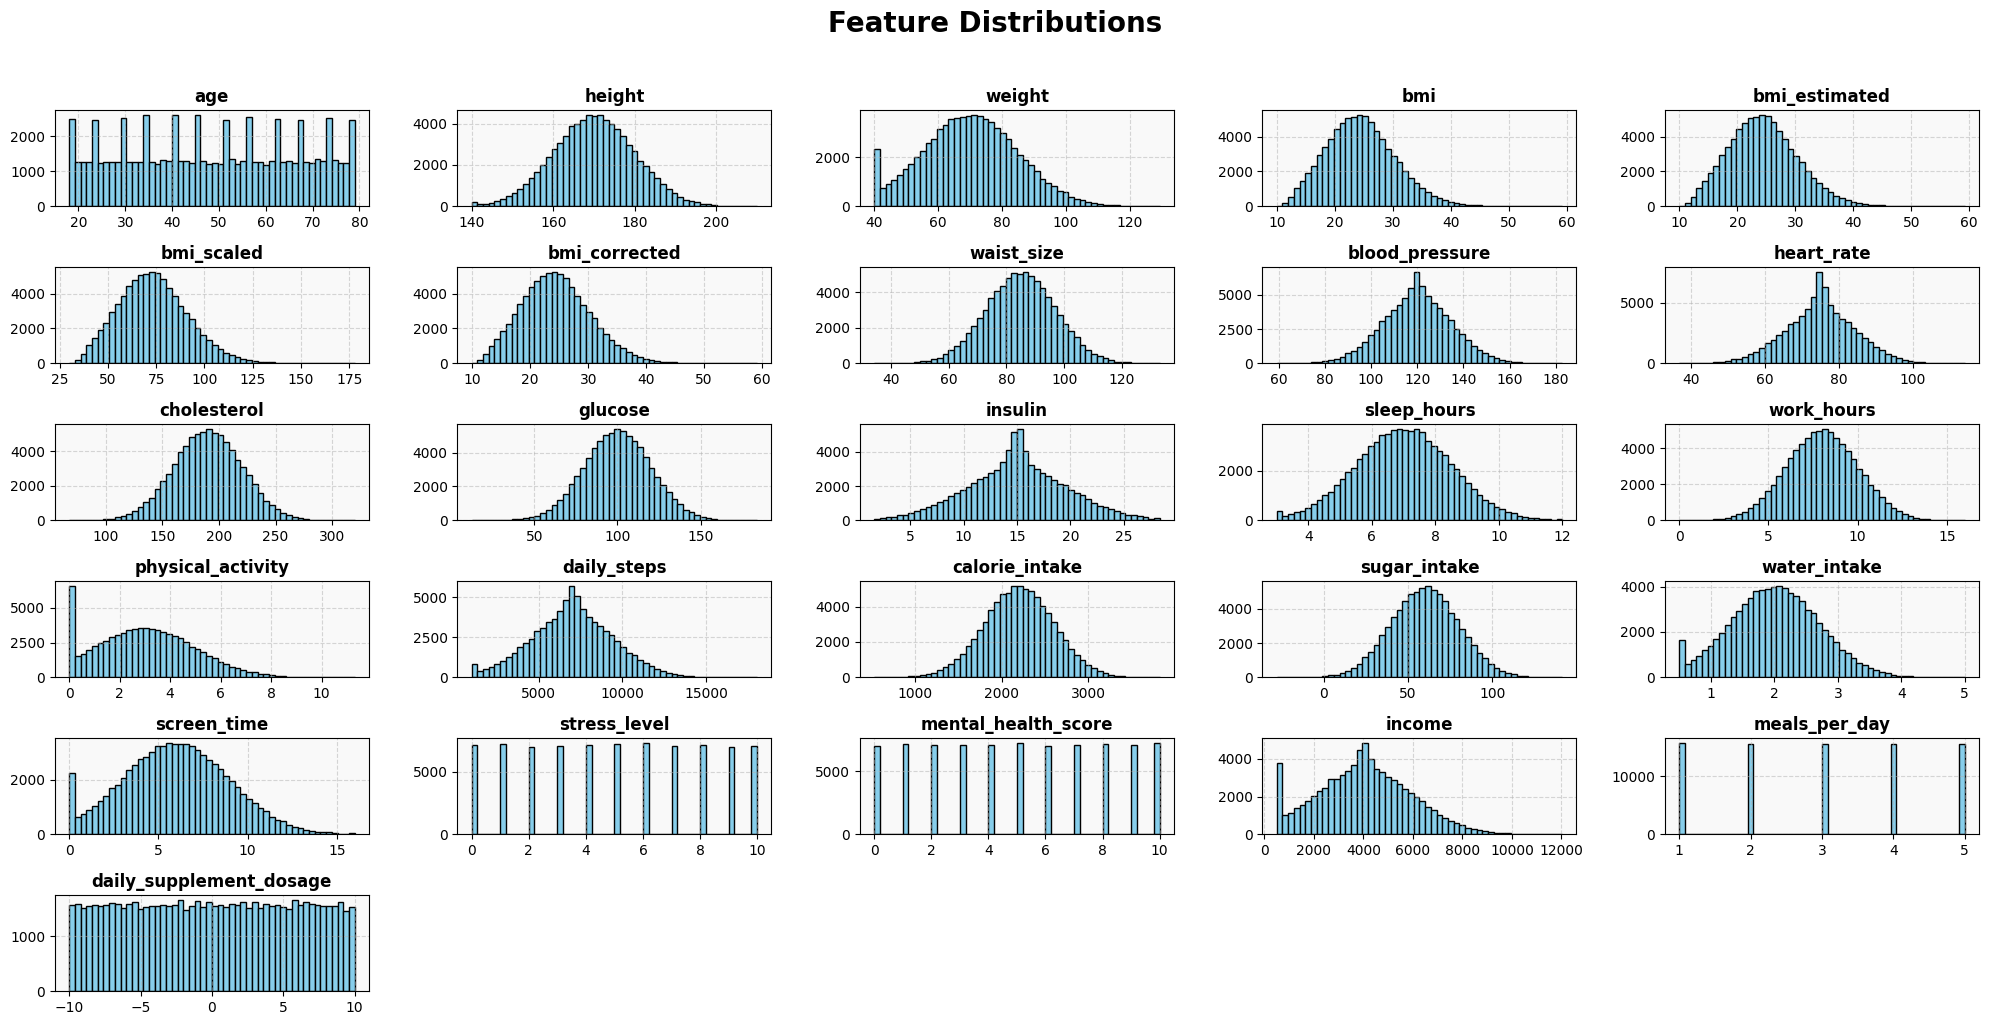

In [6]:
ax = data_df.hist(
    bins=50,
    figsize=(20, 10),
    color='skyblue',
    edgecolor='black',
    grid=False
)


for a in ax.ravel():
    a.set_facecolor("#f9f9f9")
    a.grid(True, linestyle='--', alpha=0.5)
    a.tick_params(axis='x', labelsize=10)
    a.tick_params(axis='y', labelsize=10)
    a.set_title(a.get_title(), fontsize=12, fontweight='bold')


plt.suptitle("Feature Distributions", fontsize=20, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

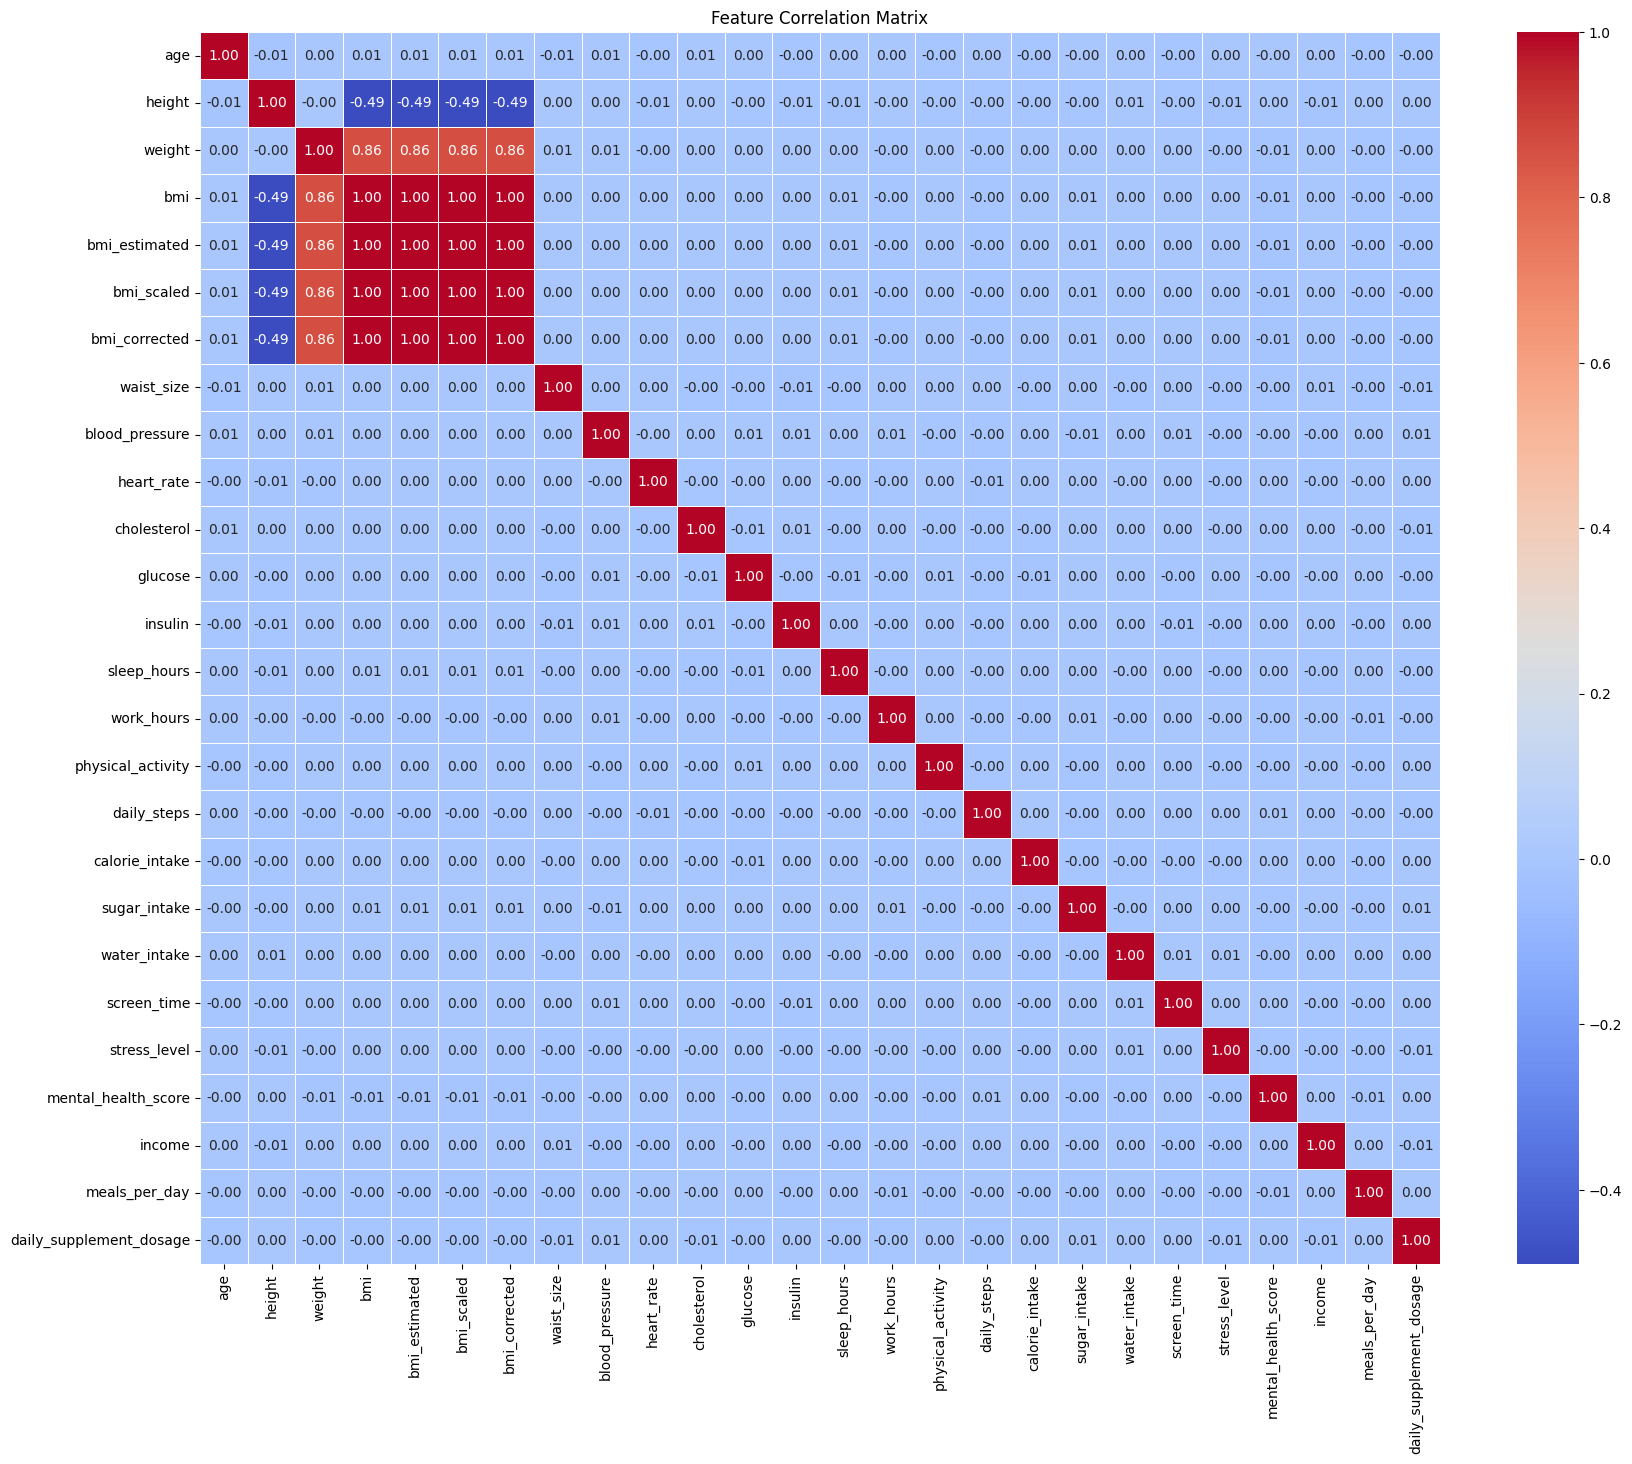

In [7]:
# plotting the correlation matrix for numerical features
numerical_features=data_df.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix = data_df[numerical_features].corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Feature Correlation Matrix')
plt.show()

from the above feature correlation matrix we can see that features: bmi,bmi_estimated,bmi_scaled and bmi_corrected are highly correlated with each other so all of these 4 features are contain the same information if we feed all of these 4 features without dropping our dataset contain redundant data so here we can drop 3 features keeping only one. So we're going to keep the bmi feature and drop the other 3 features

In [8]:
# dropping the features bmi_estimated,bmi_scaled and bmi_corrected
data_df.drop(labels=['bmi_estimated','bmi_scaled','bmi_corrected'],axis=1,inplace=True)

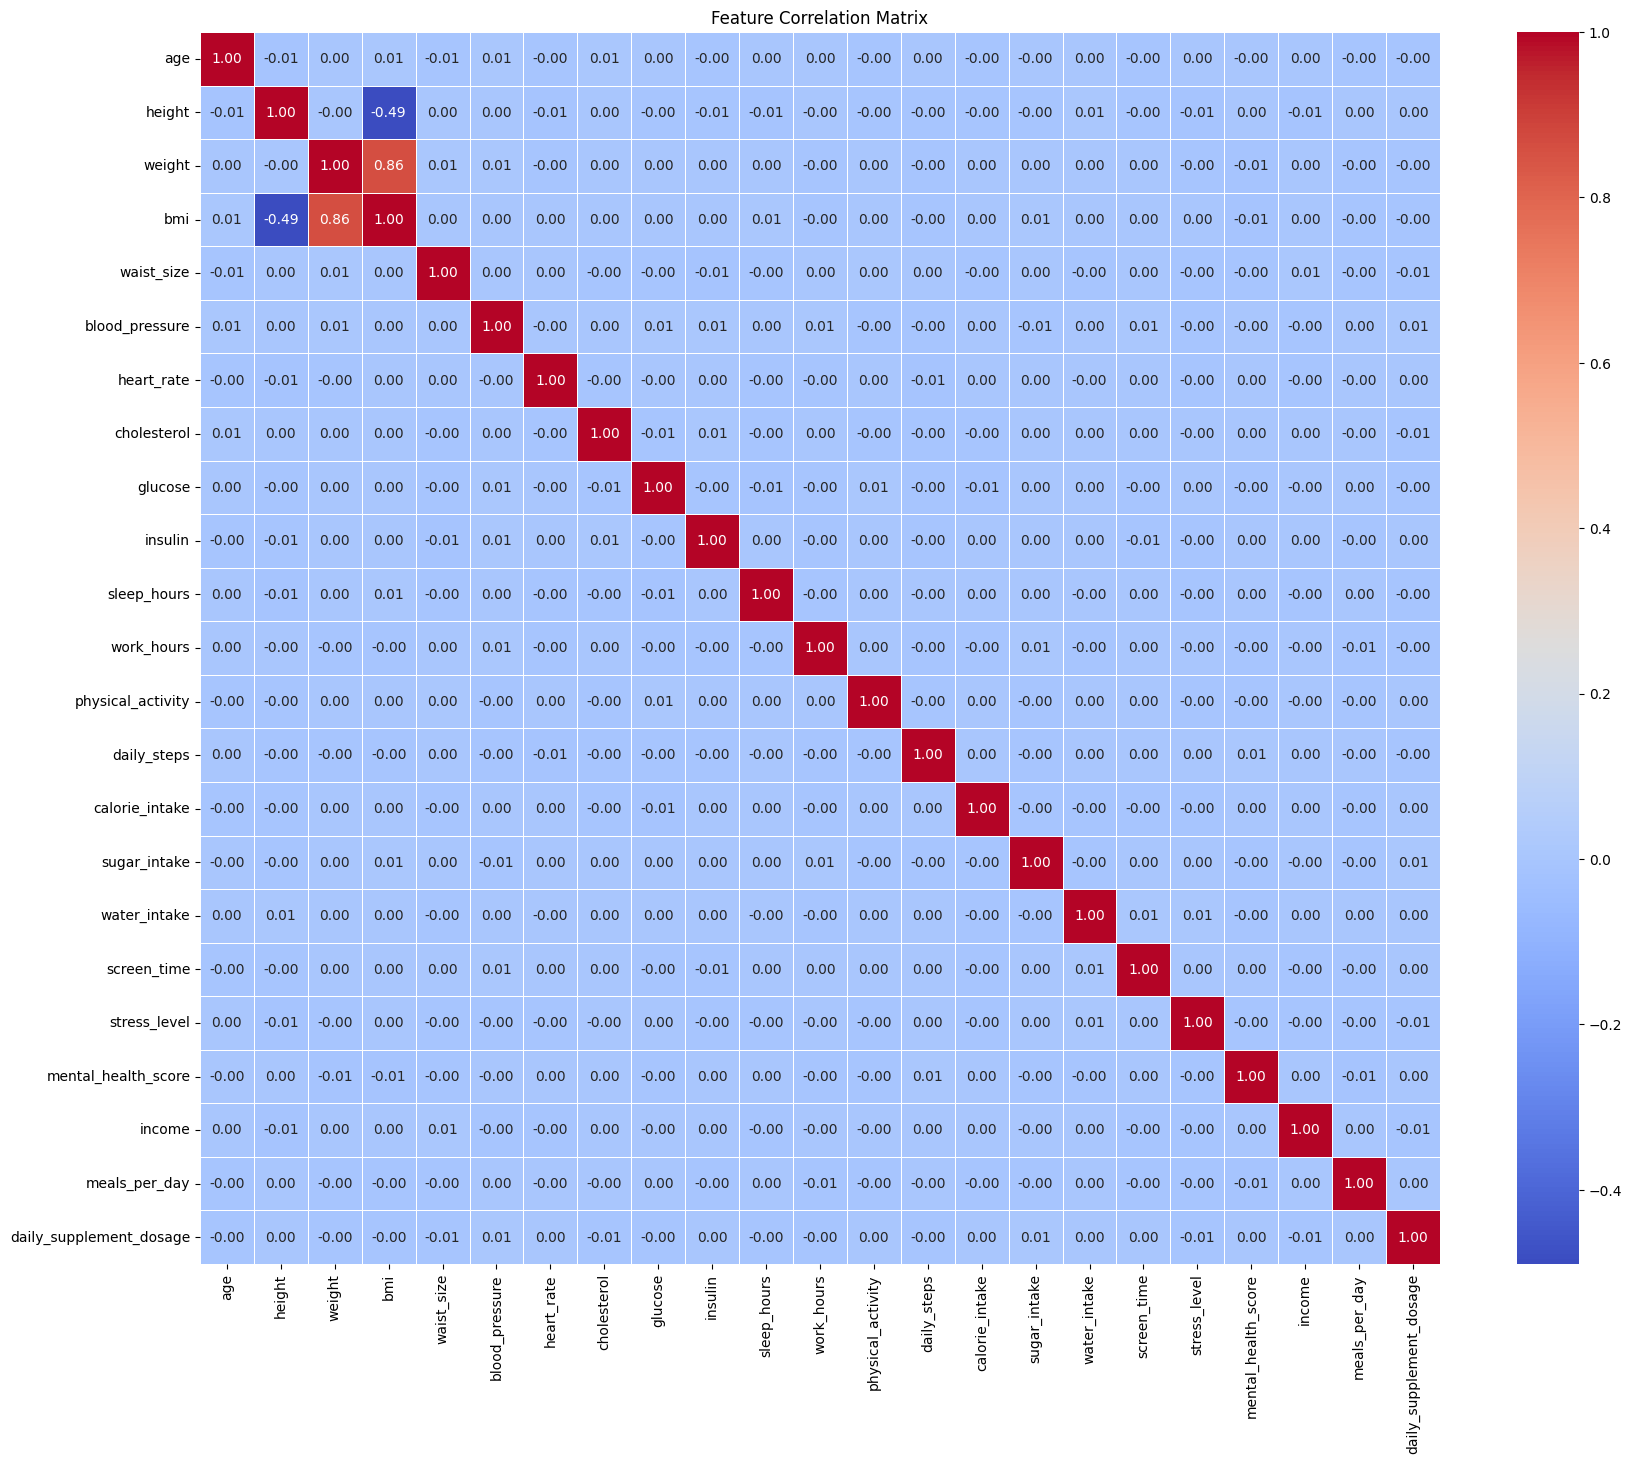

In [9]:
# plotting the correlation matrix after dropping the highly correlated features
numerical_features=data_df.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix = data_df[numerical_features].corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Feature Correlation Matrix')
plt.show()

by using work_hours and sleep_hoours feature we can create a new feature called work_sleep_balance to measure how well-balanced person's work and sleep are

In [10]:
data_df['work_sleep_balance']=data_df['work_hours']/(data_df['sleep_hours']+1e-6)

here if we get a higher value for work_sleep_balance possiblyit because person is overworks.
and reason for adding `ie-6 (very tiny value)` to the denominator is to avoid the divisable by zero error. so if person has a 0 sleep_hours it doesnt cras

In [11]:
# displaying first 10 values of the newly created feature
data_df['work_sleep_balance'][:10]

,work_sleep_balance
0,1.184597
1,1.128943
2,1.022393
3,1.829050
4,0.919486
5,1.429152
6,1.378810
7,0.566685
8,0.865370
9,0.634516


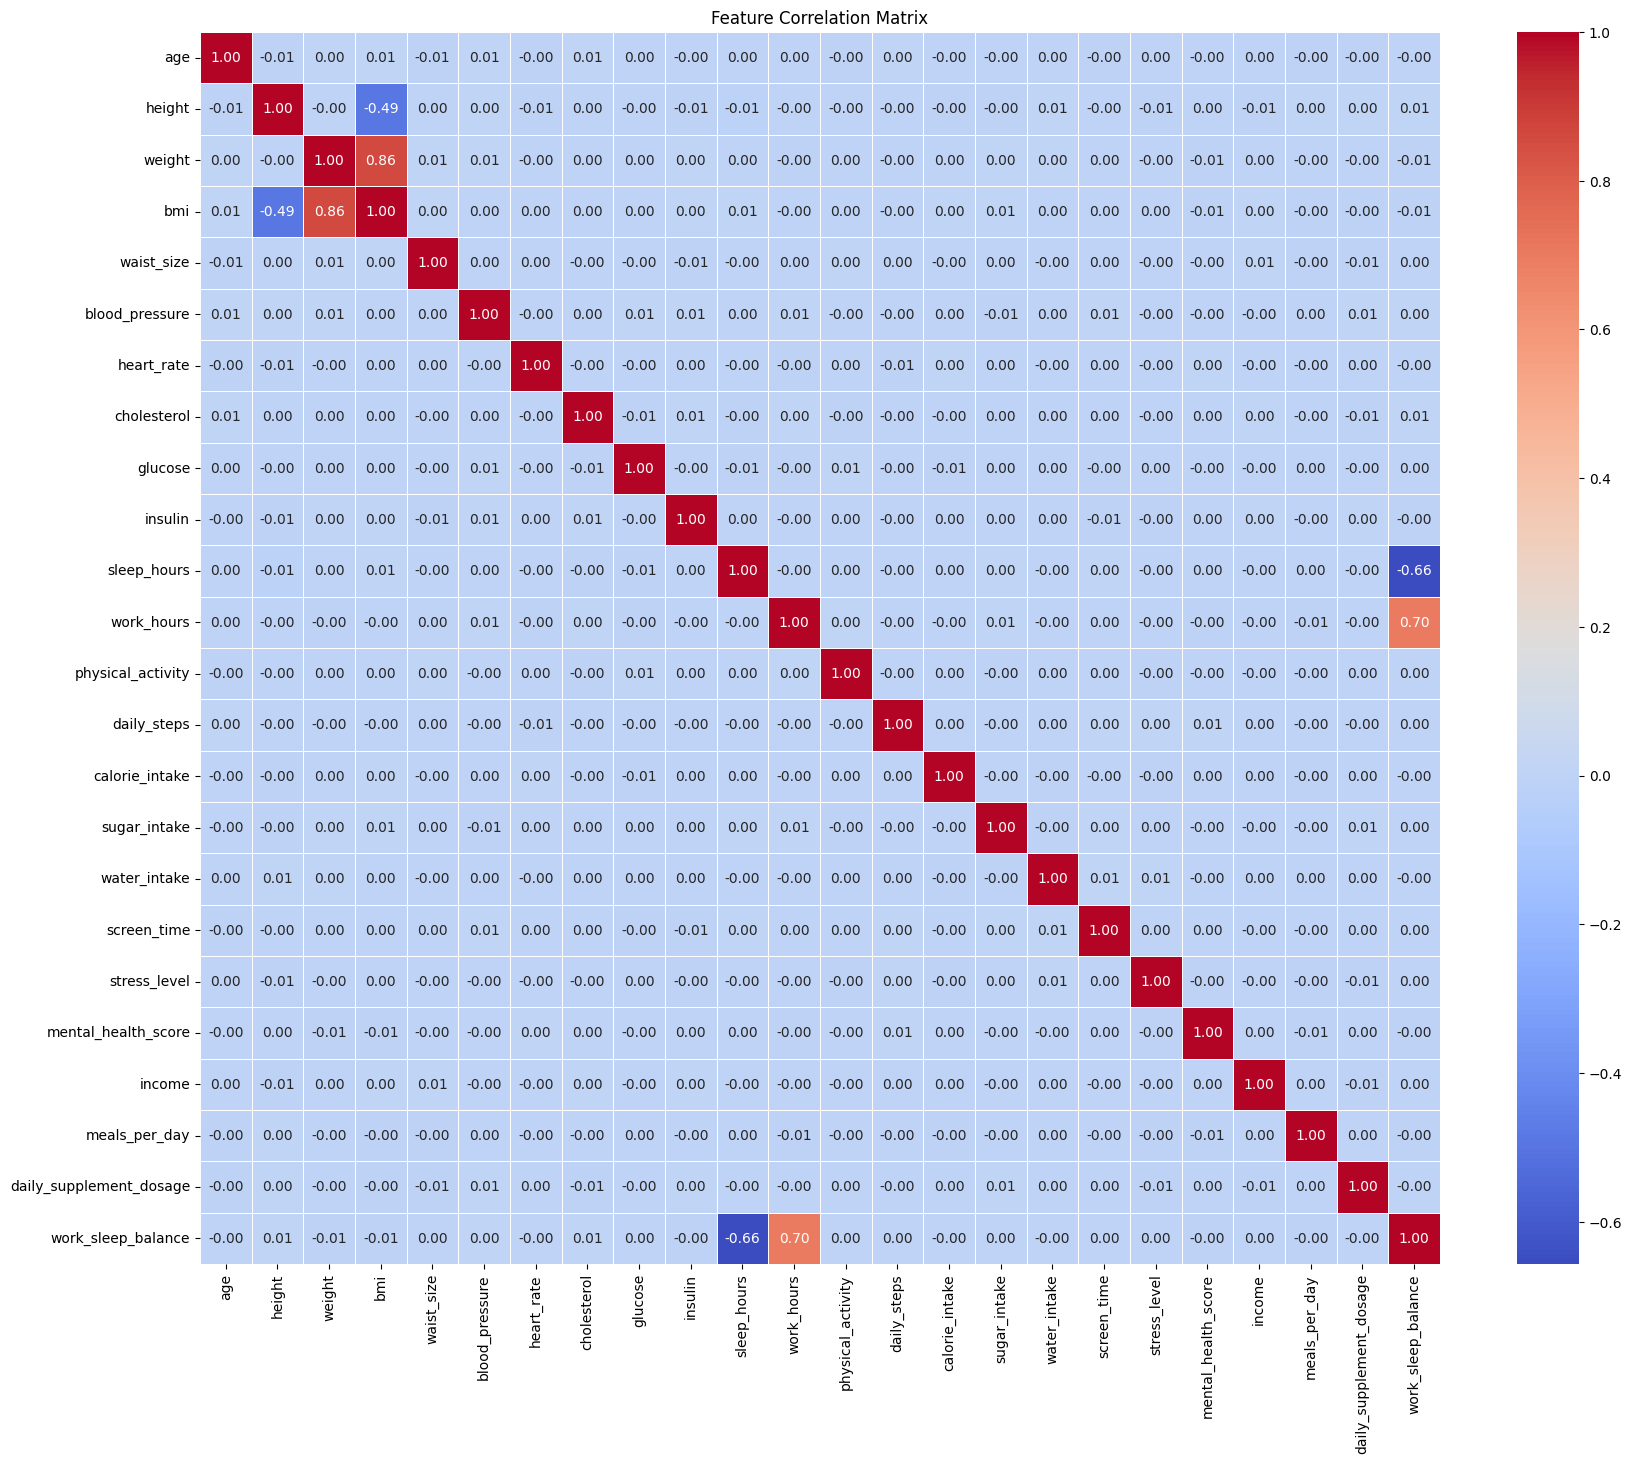

In [12]:
# feature correlated map after creating the new feature
numerical_features=data_df.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix = data_df[numerical_features].corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Feature Correlation Matrix')
plt.show()

## Feature Engineering for categorical data

In [14]:
# selecting categorical features
categorical_features=data_df.select_dtypes(include=['object']).columns.tolist()

In [15]:
print(f"categorical features: \n{categorical_features}")

categorical features: 
['gender', 'sleep_quality', 'smoking_level', 'mental_health_support', 'education_level', 'job_type', 'occupation', 'diet_type', 'device_usage', 'healthcare_access', 'insurance', 'sunlight_exposure', 'family_history', 'pet_owner', 'target']


In [16]:
# more information about categorical data
for col in categorical_features:
  print(data_df[col].value_counts())
  print()

gender
Male      39206
Female    39118
Name: count, dtype: int64

sleep_quality
Good         19730
Excellent    19613
Fair         19582
Poor         19399
Name: count, dtype: int64

smoking_level
Non-smoker    26242
Light         26162
Heavy         25920
Name: count, dtype: int64

mental_health_support
No     39181
Yes    39143
Name: count, dtype: int64

education_level
Bachelor       19871
Master         19621
High School    19608
PhD            19224
Name: count, dtype: int64

job_type
Unemployed    13167
Office        13149
Labor         13125
Tech          13047
Healthcare    12932
Service       12904
Name: count, dtype: int64

occupation
Doctor      13304
Teacher     13102
Farmer      13033
Artist      13013
Engineer    12981
Driver      12891
Name: count, dtype: int64

diet_type
Omnivore      19665
Vegan         19635
Vegetarian    19564
Keto          19460
Name: count, dtype: int64

device_usage
High        26365
Moderate    26017
Low         25942
Name: count, dtype: int64

h

In [17]:
# here job type and occupation gives the same meaining so we can drop one of these and we decided to drop the occupation while keeping jop type
data_df.drop('occupation',axis=1,inplace=True)

In [18]:
data_df.to_csv('IT24610808.csv',index=False)